## Bitcoin Daily and Archive data collection

Dataset Sources : 
- Alphavantage website (Apr, 2014 to Nov,2018) :: https://www.alphavantage.co/documentation/
- kaggle dataset (2009 to Sep 2018) :: https://www.kaggle.com/bhaskartripathi/bitcoin-time-series-all-time
*Author : Ayesha Khatib*

#### Import packages

In [3]:
import datetime
import numpy as np
import pandas as pd
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
import dateutil.parser as dparser


### Read the bitcoin datasets

Daily data can be generated from other file : https://github.com/ayeshakhatib/Twitter-Sentiment-Analysis-on-Bitcoin-Price-fluctuations/blob/master/Bitcoin_Daily_Data_Collection.ipynb

In [4]:
btc_df = pd.read_csv('./bitcoin_data/BlockChain_Train_csv.csv')
btc_daily = pd.read_csv('./bitcoin_data/btc_daily.csv')

In [5]:
# Print the head
btc_df.head(2)

,Date,Close,USD_Exchange_Trade_Volume,Bitcoins_in_circulation,MarketCap,BlockSize,AvgBlockSize,Orphaned_Block,TransactionsPerBlock,MedianTransactCnfmTime,...,USD/JPY,USD/CHF,USD/KRW,USD/GBP,EUR/KRW,USD/CNY,Google Trends Interest,GTrends Normalized,US Federal funds rate,Breakeven Inflation Rate
0,3-Jan-09,0.0,0.0,50.0,0.0,0.0,0.0,0,1.0,0.0,...,90.73,1.06,1269.75,0.69,1774.86,6.83,0,0.0,0.08,0.15
1,5-Jan-09,0.0,0.0,50.0,0.0,0.0,0.0,0,1.0,0.0,...,92.08,1.08,1326.15,0.69,1843.95,6.82,0,0.0,0.11,0.15


In [6]:
# Print the head
btc_daily.head()

,Date,1a. open (AUD),1b. open (USD),2a. high (AUD),2b. high (USD),3a. low (AUD),3b. low (USD),4a. close (AUD),4b. close (USD),Volume,6. market cap (USD)
0,2018-11-18,7492.189034,5496.244377,7626.229175,5591.077108,7484.897493,5492.418373,7597.821366,5558.554483,378.945507,2.106389e+06
1,2018-11-17,7584.473328,5562.450323,7584.473328,5562.450323,7460.055486,5472.671315,7489.009085,5493.911578,445.250283,2.446166e+06
2,2018-11-16,7713.451418,5610.321440,7754.338113,5643.085057,7486.662764,5490.716087,7575.802233,5556.090945,657.456297,3.652887e+06
3,2018-11-15,7880.303321,5697.870699,7932.051690,5767.716190,7283.846389,5293.904678,7708.359104,5607.531189,1222.408391,6.854693e+06
4,2018-11-14,8728.695620,6314.188010,8762.394534,6325.154411,7697.537831,5575.501833,7835.519523,5665.002240,1212.801094,6.870521e+06


In [7]:
# # Print the original columns
btc_daily.columns

Index(['Date', '1a. open (AUD)', '1b. open (USD)', '2a. high (AUD)',
       '2b. high (USD)', '3a. low (AUD)', '3b. low (USD)', '4a. close (AUD)',
       '4b. close (USD)', 'Volume', '6. market cap (USD)'],
      dtype='object')

In [8]:
# Define a new dataframe and only choose the required columns.

btc_daily_usd=pd.DataFrame()

# select the columns
btc_daily_usd['Date'] = btc_daily['Date']
btc_daily_usd['Close'] = btc_daily['4b. close (USD)']
btc_daily_usd['Market_Cap'] = btc_daily['6. market cap (USD)']
btc_daily_usd['Volume'] = btc_daily['Volume']

In [9]:
btc_daily_usd['Date'] = pd.to_datetime(btc_daily_usd['Date'])

In [10]:
# Print the head
btc_daily_usd.head()

,Date,Close,Market_Cap,Volume
0,2018-11-18,5558.554483,2.106389e+06,378.945507
1,2018-11-17,5493.911578,2.446166e+06,445.250283
2,2018-11-16,5556.090945,3.652887e+06,657.456297
3,2018-11-15,5607.531189,6.854693e+06,1222.408391
4,2018-11-14,5665.002240,6.870521e+06,1212.801094


In [11]:
# Dataframe # 1
btc_daily_usd.shape

(1693, 4)

In [12]:
btc_daily_usd.to_csv('./btc_daily_usd.csv')

In [13]:
# Define a new dataframe and only choose the required columns.
btc_data=pd.DataFrame()

# select the columns
btc_data['Date'] = btc_df['Date']
btc_data['Close'] = btc_df['Close']
btc_data['Market_Cap'] = btc_df['MarketCap']
btc_data['Volume'] = btc_df['USD_Exchange_Trade_Volume']

In [14]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

In [15]:
# Dataframe # 2
btc_data.shape

(1773, 4)

In [16]:
# Print the tail
btc_data.tail()

,Date,Close,Market_Cap,Volume
1768,2018-09-09,6286.43,1.080000e+11,291261346.9
1769,2018-09-11,6296.32,1.090000e+11,290980772.8
1770,2018-09-13,6450.18,1.110000e+11,321882304.6
1771,2018-09-15,6518.66,1.130000e+11,360631436.3
1772,2018-09-17,6400.60,1.110000e+11,181083665.0


In [17]:
# Concat the Dataframe 1 & 2
btc_all = pd.concat([btc_data,btc_daily_usd],ignore_index=True)

In [18]:
# Dataframe shape
btc_all.shape

(3466, 4)

In [19]:
btc_all = btc_all.drop_duplicates(subset='Date',keep='last')

In [20]:
# Dataframe shape
btc_all.shape

(2650, 4)

In [21]:
#btc_all.to_csv('./btc_all_data.csv', encoding='utf-8')

In [22]:
btc_all.to_csv('./btc_all_updated.csv', encoding='utf-8')

In [23]:
bitcoin_df=pd.read_csv('./bitcoin_data/btc_all_updated.csv')

In [52]:
#bitcoin_df.drop(['Unnamed: 0'],axis=1,inplace=True)
#bitcoin_df.drop(['Unnamed: 5'],axis=1,inplace=True)
bitcoin_df.head()

,Date,Close,Market_Cap,Volume
0,2/01/2013,13.40,142323745.0,712505.74
1,4/01/2013,13.49,143379675.0,841973.34
2,6/01/2013,13.53,143904635.4,425231.70
3,8/01/2013,13.83,147203062.5,400256.34
4,10/01/2013,14.32,152518740.0,778992.83


In [27]:
# dtypes of the dataframe.
bitcoin_df.dtypes

Date           object
Close         float64
Market_Cap    float64
Volume        float64
Unnamed: 5    float64
dtype: object

In [50]:
bitcoin_df.head(10)

,Date,Close,Market_Cap,Volume
0,2/01/2013,13.40,142323745.0,712505.74
1,4/01/2013,13.49,143379675.0,841973.34
2,6/01/2013,13.53,143904635.4,425231.70
3,8/01/2013,13.83,147203062.5,400256.34
4,10/01/2013,14.32,152518740.0,778992.83
5,12/01/2013,14.35,152924255.9,1029162.05
6,14/01/2013,14.30,152490195.0,474366.16
7,16/01/2013,14.69,156730161.1,1170901.62
8,18/01/2013,15.99,170657458.5,3489818.14
9,20/01/2013,15.89,169751678.3,669916.27


In [29]:
bitcoin_df.isnull().sum().sort_values(ascending=False)

Unnamed: 5    1920
Volume           0
Market_Cap       0
Close            0
Date             0
dtype: int64

### Visualization of Bitcoin Price from Year 2009 to 2018

In [30]:
bitcoin_df.head()

,Date,Close,Market_Cap,Volume,Unnamed: 5
0,2/01/2013,13.40,142323745.0,712505.74,NaN
1,4/01/2013,13.49,143379675.0,841973.34,NaN
2,6/01/2013,13.53,143904635.4,425231.70,NaN
3,8/01/2013,13.83,147203062.5,400256.34,NaN
4,10/01/2013,14.32,152518740.0,778992.83,NaN


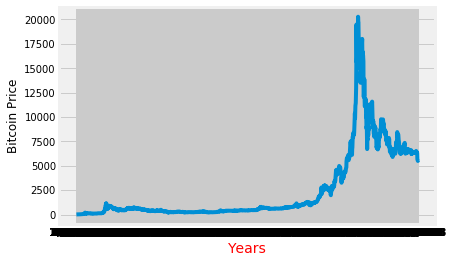

<Figure size 720x432 with 0 Axes>

In [31]:
xs = [x for x in bitcoin_df['Date']]
ys = [x for x in bitcoin_df['Close']]
plt.plot(xs, ys)
plt.xlabel('Years',fontsize=14, color='red')
plt.ylabel('Bitcoin Price')
plt.figure(figsize=(10, 6))
#plt.gcf().autofmt_xdate()
plt.show()

### Time-series Visualization

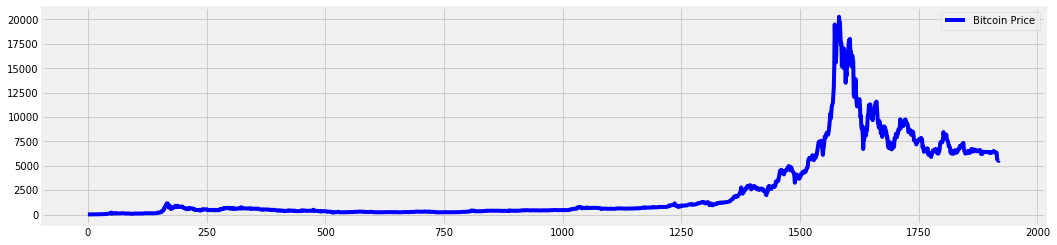

In [38]:
time_btc = pd.Series(data=bitcoin_df['Close'].values.astype('float'),index=bitcoin_df.index)
time_btc.plot(figsize=(16, 4), label="Bitcoin Price", legend=True,color='b')
plt.show()

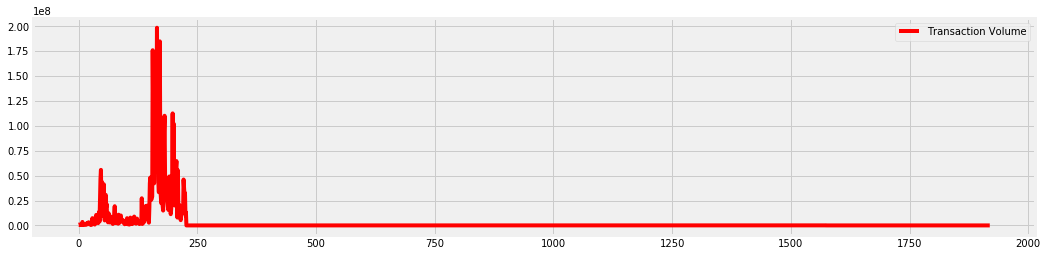

In [41]:
time_btc = pd.Series(data=bitcoin_df['Volume'].values.astype('float'),index=bitcoin_df.index)
time_btc.plot(figsize=(16, 4), label="Transaction Volume", legend=True,color='r')
plt.show()

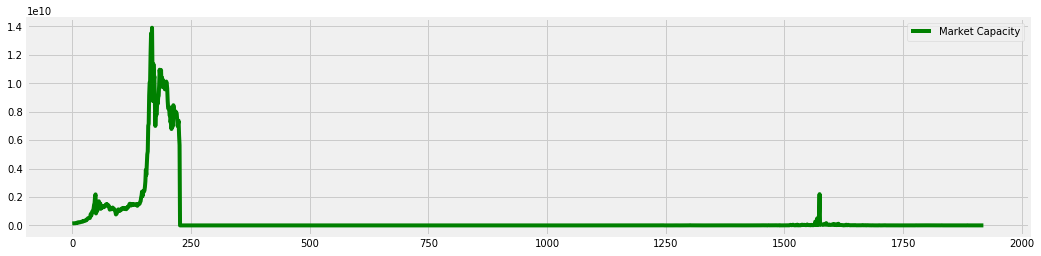

In [42]:
time_btc = pd.Series(data=bitcoin_df['Market_Cap'].values.astype('float'),index=bitcoin_df.index)
time_btc.plot(figsize=(16, 4), label="Market Capacity", legend=True,color='g')
plt.show()